<a href="https://colab.research.google.com/github/BiancaLaurindo/disney_recommendation/blob/main/disney_plus_recommedation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Disney recommendation modelling

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - show_id, type, title, country, cast, date_added, directors, ratings, release year and duration.


**Dataset Info -** The Dataset contains 1,535 rows and 15 columns, 1 ID Column and others described below.

- **id**: The title ID on JustWatch
- **title**: The name of the title
- **show_type**: TV show or movie
- **description**: A brief description
- **release_year**: The release year
- **age_certification**: The age certification
- **runtime**: The length of the episode (SHOW) or movie
- **genres**: A list of genres
- **production_countries**: A list of countries that produced the title
- **seasons**: Number of seasons if it's a SHOW
- **imdb_id**: The title ID on IMDB
- **imdb_score**: Score on IMDB
- **imdb_votes**: Votes on IMDB
- **tmdb_popularity**: Popularity on TMDB
- **tmdb_score**: Score on TMDB



- **Goal**

The goal of this project is to develop a recommendation system for Disney Plus, enhancing user experience by efficiently helping them discover new shows and movies of their interest. Currently, users may struggle to find content that matches their personal preferences due to the extensive library available. An effective recommendation system can not only increase user engagement but also improve overall satisfaction by facilitating personalized discovery of relevant content.

- **ML Problem Statement**

The associated ML problem is to develop a recommendation model capable of analyzing the viewing history and preferences of Disney Plus users to predict and recommend new shows and movies they are likely to enjoy. This is a collaborative filtering-based item recommendation problem aimed at delivering accurate and relevant recommendations to enhance user discovery experience on the streaming service.

## Importing the libraries :

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lets_plot as lp
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset :

In [185]:
file_path = '/content/drive/My Drive/Colab Notebooks/titles.csv'
disney_plus_edw = pd.read_csv(file_path)

## Exploratory Data Wrangling (EDW)

In [186]:
disney_plus_edw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1535 non-null   object 
 1   title                 1535 non-null   object 
 2   type                  1535 non-null   object 
 3   description           1529 non-null   object 
 4   release_year          1535 non-null   int64  
 5   age_certification     1210 non-null   object 
 6   runtime               1535 non-null   int64  
 7   genres                1535 non-null   object 
 8   production_countries  1535 non-null   object 
 9   seasons               415 non-null    float64
 10  imdb_id               1133 non-null   object 
 11  imdb_score            1108 non-null   float64
 12  imdb_votes            1105 non-null   float64
 13  tmdb_popularity       1524 non-null   float64
 14  tmdb_score            1426 non-null   float64
dtypes: float64(5), int64(

In [187]:
disney_plus_edw.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5
5,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1949,G,68,"['fantasy', 'horror', 'animation', 'comedy', '...",['US'],NaN,tt0041094,6.9,15405.0,10.862,6.5
6,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,157099.0,144.284,7.0
7,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,63,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,129548.0,69.875,7.0
8,tm4623,The Three Caballeros,MOVIE,For Donald's birthday he receives a box with t...,1944,G,71,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0038166,6.3,13889.0,11.750,6.4
9,tm77826,The Reluctant Dragon,MOVIE,Humorist Robert Benchley attempts to find Walt...,1941,G,74,"['fantasy', 'animation', 'family', 'comedy']",['US'],NaN,tt0034091,6.8,3280.0,6.958,6.6


In [188]:
# Limpeza dos dados de gênero
disney_plus_edw['genres'] = disney_plus_edw['genres'].str.replace("[", "").str.replace("]", "")
disney_plus_edw['genre'] = disney_plus_edw['genres'].str.split(',').str[0].str.strip()

# Limpeza dos dados de países de produção
disney_plus_edw['production_countries'] = disney_plus_edw["production_countries"].str.replace("[","").str.replace("]","")
disney_plus_edw['production_country'] = disney_plus_edw['production_countries'].str.split(',').str[0]

# Remover colunas originais
disney_plus_edw.drop(['genres', 'production_countries'], axis=1, inplace=True)

#Remover ''
disney_plus_edw['genre'] = disney_plus_edw['genre'].str.replace("'", "", regex=False).str.strip()
disney_plus_edw['production_country'] = disney_plus_edw['production_country'].str.replace("'", "", regex=False).str.strip()

In [189]:
print(disney_plus_edw['genre'].unique())

print(disney_plus_edw['production_country'].unique())

['animation' 'fantasy' 'family' 'comedy' 'action' 'documentation'
 'thriller' 'romance' 'scifi' 'music' 'western' 'drama' '' 'crime'
 'horror' 'history' 'reality' 'war']
['US' 'GB' 'CA' '' 'FR' 'SE' 'JP' 'AU' 'SUHH' 'NZ' 'DE' 'PL' 'SG' 'ES'
 'IN' 'XX' 'HK' 'CN' 'AR' 'CI' 'NL' 'MX' 'BE' 'IT' 'CL' 'GR' 'DK' 'PH'
 'BR' 'BW' 'ZA' 'KR']


In [190]:
# Remover linhas com valores vazios em 'genres' e 'production_country'
disney_plus_edw_cleaned = disney_plus_edw.dropna(subset=['genre', 'production_country'])

# Opcionalmente, remover linhas com strings vazias (se necessário)
disney_plus_edw_cleaned = disney_plus_edw_cleaned[(disney_plus_edw_cleaned['genre'] != '') &
                                                  (disney_plus_edw_cleaned['production_country'] != '')]

print(f"Number of rows after cleaning: {disney_plus_edw_cleaned.shape[0]}")

Number of rows after cleaning: 1464


In [191]:
print(disney_plus_edw_cleaned['genre'].unique())

print(disney_plus_edw_cleaned['production_country'].unique())

['animation' 'fantasy' 'family' 'comedy' 'action' 'documentation'
 'thriller' 'romance' 'scifi' 'music' 'western' 'drama' 'crime' 'horror'
 'history' 'reality' 'war']
['US' 'GB' 'CA' 'FR' 'SE' 'JP' 'AU' 'SUHH' 'NZ' 'DE' 'PL' 'SG' 'ES' 'IN'
 'XX' 'HK' 'CN' 'AR' 'CI' 'NL' 'MX' 'BE' 'IT' 'CL' 'GR' 'DK' 'PH' 'BR'
 'BW' 'ZA' 'KR']


In [192]:
disney_plus_edw_cleaned.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,NaN,tt0032455,7.7,94681.0,57.751,7.4,animation,US
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,NaN,tt0029583,7.6,195321.0,107.137,7.1,fantasy,US
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,NaN,tt0032910,7.5,141937.0,71.160,7.1,animation,US
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,NaN,tt0034492,7.3,140406.0,68.136,7.0,animation,US
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,NaN,tt0043067,6.9,8229.0,10.698,6.5,family,GB


In [193]:
disney_plus_edw_cleaned.nunique() # Count unique rows in the dataset.

,0
id,1464
title,1430
type,2
description,1461
release_year,91
age_certification,9
runtime,157
seasons,15
imdb_id,1107
imdb_score,66


In [194]:
disney_plus_edw_cleaned = disney_plus_edw_cleaned.drop_duplicates(subset=['title']) ## Remove title duplicates

In [195]:
disney_plus_edw_cleaned.nunique() # Count unique rows in the dataset.

,0
id,1430
title,1430
type,2
description,1428
release_year,91
age_certification,9
runtime,157
seasons,15
imdb_id,1073
imdb_score,65


In [196]:
disney_plus_edw_cleaned.isnull().sum() # Count null rows in the dataset.

,0
id,0
title,0
type,0
description,2
release_year,0
age_certification,281
runtime,0
seasons,1044
imdb_id,357
imdb_score,376


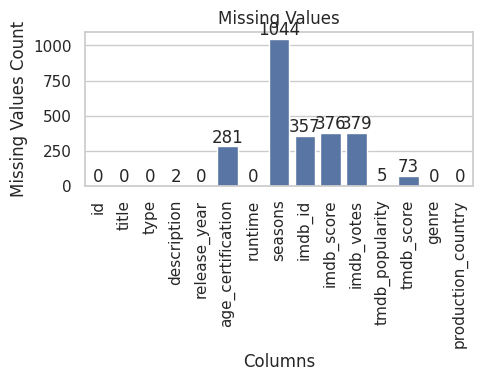

In [197]:
missing_values_count = disney_plus_edw_cleaned.isnull().sum()

# Configura o tamanho da figura
plt.figure(figsize=(5, 2))

# Cria o gráfico de barras
sns.barplot(x=missing_values_count.index, y=missing_values_count)

# Adiciona título ao gráfico
plt.title("Missing Values")

# Configurações adicionais para o eixo x, eixo y e rotação dos rótulos no eixo x
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)

# Adiciona os valores numéricos acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            int(height), fontsize=12, ha='center', va='bottom')

# Exibe o gráfico
plt.show()

In [198]:
#substituir os nulos por 0, já que as colunas são relevantes pro modelo, e os caso são poucos, ou seja não são outliers
disney_plus_edw_cleaned['seasons'] = disney_plus_edw_cleaned['seasons'].fillna(0)
disney_plus_edw_cleaned['tmdb_score'] = disney_plus_edw_cleaned['tmdb_score'].fillna(0)
disney_plus_edw_cleaned['tmdb_popularity'] = disney_plus_edw_cleaned['tmdb_popularity'].fillna(0)

In [199]:
disney_plus_edw_cleaned = disney_plus_edw_cleaned.dropna(subset=['description']) # Remove rows NULL

In [200]:
disney_plus_edw_cleaned = disney_plus_edw_cleaned.drop(columns=['imdb_score','imdb_votes','imdb_id']) # remove columns with missing values outliers

In [201]:
disney_plus_edw_cleaned.isnull().sum() # Count null rows in the dataset.

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,280
runtime,0
seasons,0
tmdb_popularity,0
tmdb_score,0


In [202]:
nan_age_certification = disney_plus_edw_cleaned[disney_plus_edw_cleaned['age_certification'].isna()]

# Exibir o resultado
nan_age_certification.head(280)

,id,title,type,description,release_year,age_certification,runtime,seasons,tmdb_popularity,tmdb_score,genre,production_country
12,tm77407,Saludos Amigos,MOVIE,Live-action segments show members of the Disne...,1942,NaN,42,0.0,20.418,5.8,animation,US
13,tm71205,How to Play Baseball,MOVIE,Goofy shows us the national pastime. After a b...,1942,NaN,8,0.0,4.179,6.6,comedy,US
14,tm5822,Melody Time,MOVIE,In the grand tradition of Disney's great music...,1948,NaN,75,0.0,8.856,6.2,comedy,US
16,tm134279,Three Little Pigs,MOVIE,The two pigs building houses of hay and sticks...,1933,NaN,8,0.0,8.883,6.8,comedy,US
17,tm74410,Tugboat Mickey,MOVIE,Mickey is performing routine maintenance on hi...,1940,NaN,7,0.0,5.845,6.2,animation,US
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,tm1034897,The Last of the Chupacabras,MOVIE,In a world where culture has nearly ceased to ...,2021,NaN,14,0.0,4.222,6.1,fantasy,US
1515,tm1035015,Dinner Is Served,MOVIE,A Chinese student at an elite U.S. boarding sc...,2021,NaN,21,0.0,2.403,5.9,drama,US
1517,tm1034999,Growing Fangs,MOVIE,"Val Garcia, a Mexican-American teen who is hal...",2021,NaN,19,0.0,14.198,6.8,drama,US
1518,tm1074538,Disney Princess Remixed: An Ultimate Princess ...,MOVIE,A music special celebrating the empowering att...,2021,NaN,22,0.0,6.381,5.5,music,US


In [203]:
print(disney_plus_edw_cleaned['age_certification'].unique())

['G' 'PG' nan 'TV-G' 'TV-PG' 'TV-14' 'PG-13' 'TV-Y7' 'TV-Y' 'TV-MA']


In [204]:
# Função para substituir NaNs com base na distribuição das certificações por gênero
def fill_na_with_distribution(df):
    # Cria um DataFrame vazio para armazenar as substituições
    filled_df = df.copy()

    # Obtém todos os gêneros únicos
    genres = df['genre'].unique()

    # Itera sobre cada gênero único
    for genre in genres:
        # Subconjunto do DataFrame para o gênero atual
        genre_df = df[df['genre'] == genre]

        # Calcula a distribuição das certificações para o gênero atual
        dist = genre_df['age_certification'].dropna().value_counts(normalize=True)

        # Define uma função para preencher NaNs com base na distribuição
        def fill_with_distribution(value):
            if pd.isna(value):
                return np.random.choice(dist.index, p=dist.values) if not dist.empty else np.nan
            else:
                return value

        # Aplica a função para preencher NaNs
        filled_df.loc[filled_df['genre'] == genre, 'age_certification'] = genre_df['age_certification'].apply(fill_with_distribution)

    return filled_df

# Preencher NaNs com a distribuição calculada
disney_plus = fill_na_with_distribution(disney_plus_edw_cleaned)

# Exibir as primeiras linhas para verificar se a substituição foi aplicada
print(disney_plus.head())

# Confirmar que os NaNs foram substituídos
print("Quantidade de NaNs restantes na coluna 'age_certification':", disney_plus['age_certification'].isna().sum())

        id                            title   type  \
0  tm74391                         Fantasia  MOVIE   
1  tm67803  Snow White and the Seven Dwarfs  MOVIE   
2  tm82546                        Pinocchio  MOVIE   
3  tm79357                            Bambi  MOVIE   
4  tm62671                  Treasure Island  MOVIE   

                                         description  release_year  \
0  Walt Disney's timeless masterpiece is an extra...          1940   
1  A beautiful girl, Snow White, takes refuge in ...          1937   
2  Lonely toymaker Geppetto has his wishes answer...          1940   
3  Bambi's tale unfolds from season to season as ...          1942   
4  Enchanted by the idea of locating treasure bur...          1950   

  age_certification  runtime  seasons  tmdb_popularity  tmdb_score      genre  \
0                 G      120      0.0           57.751         7.4  animation   
1                 G       83      0.0          107.137         7.1    fantasy   
2          

In [205]:
print(disney_plus['age_certification'].unique())

['G' 'PG' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'PG-13' 'TV-14' 'TV-MA']


In [206]:
disney_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0 to 1534
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1428 non-null   object 
 1   title               1428 non-null   object 
 2   type                1428 non-null   object 
 3   description         1428 non-null   object 
 4   release_year        1428 non-null   int64  
 5   age_certification   1428 non-null   object 
 6   runtime             1428 non-null   int64  
 7   seasons             1428 non-null   float64
 8   tmdb_popularity     1428 non-null   float64
 9   tmdb_score          1428 non-null   float64
 10  genre               1428 non-null   object 
 11  production_country  1428 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 145.0+ KB


In [207]:
disney_plus.isnull().sum() # Count null rows in the dataset.

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
seasons,0
tmdb_popularity,0
tmdb_score,0


In [208]:
## Exploratory Data Analysis (EDA)

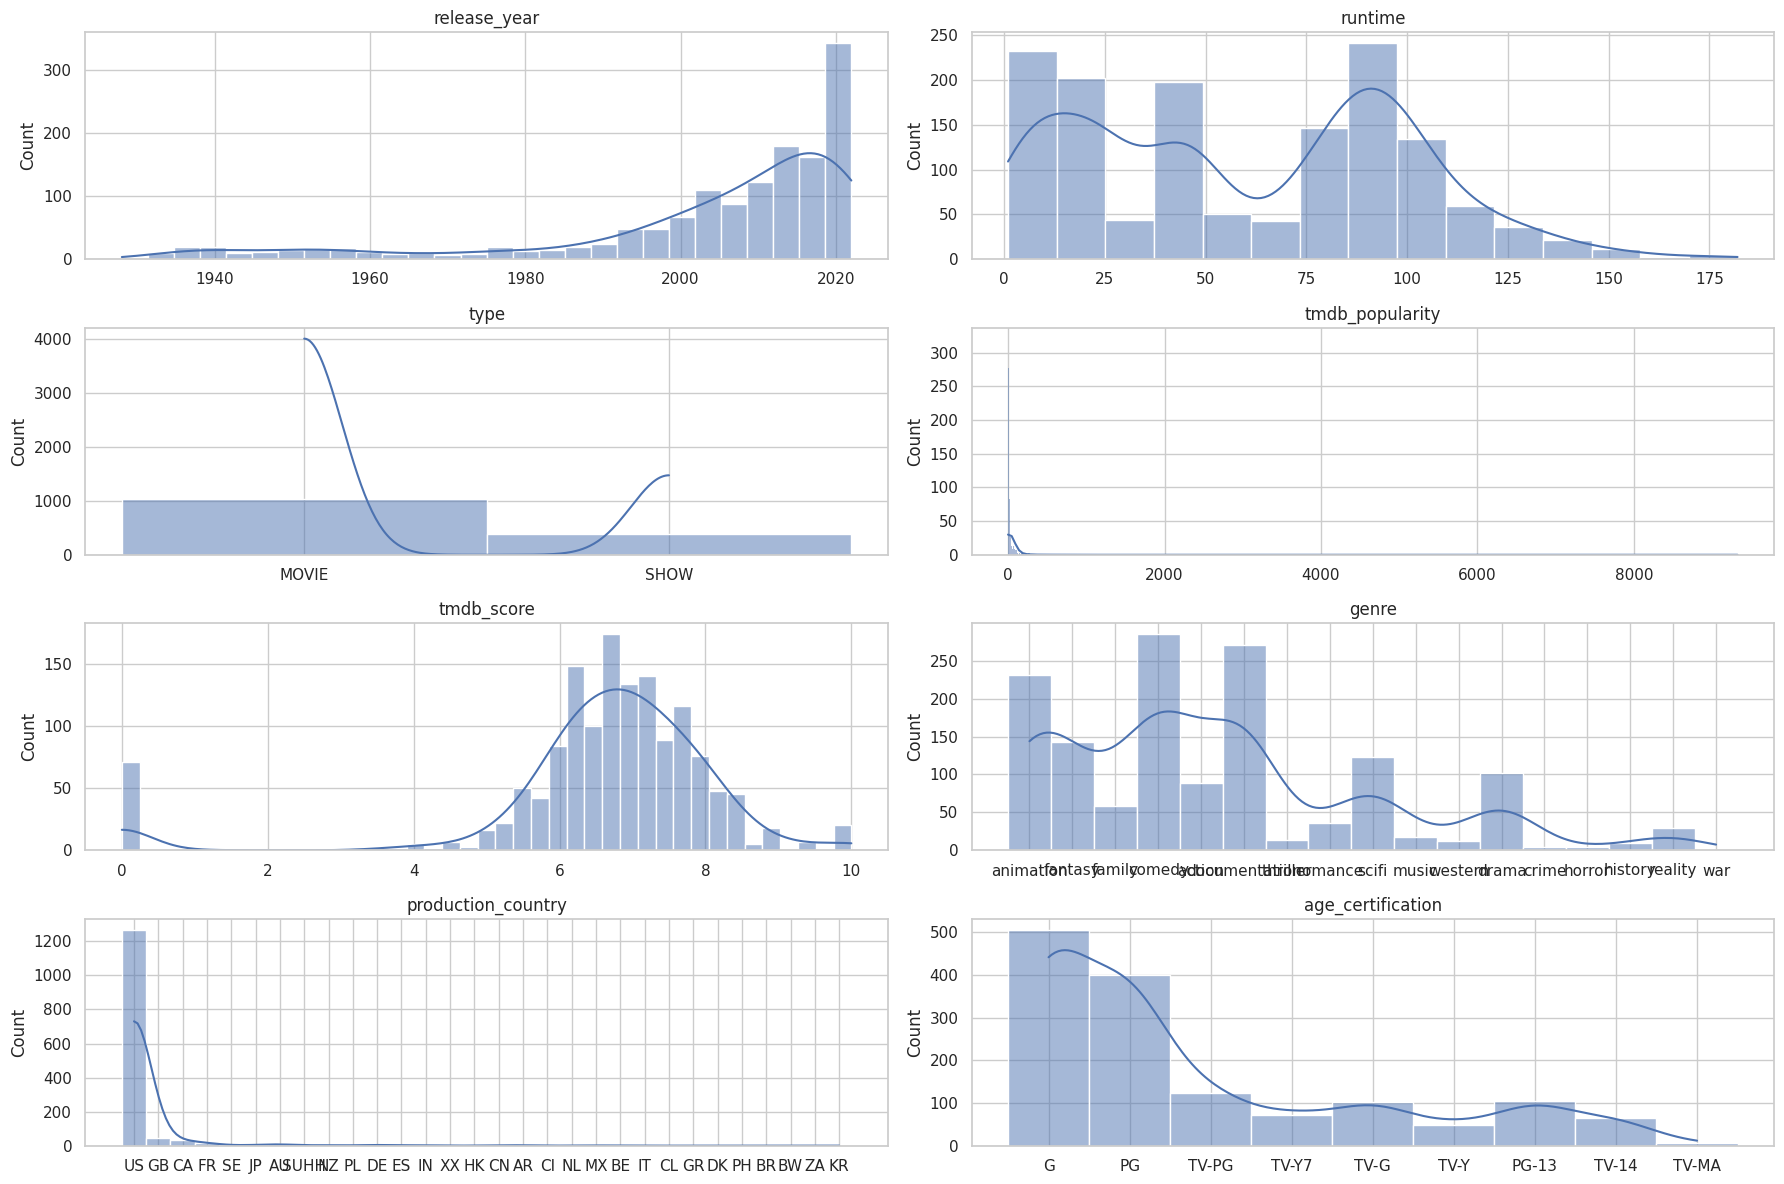

In [209]:
variables = ['release_year', 'runtime', 'type', 'tmdb_popularity', 'tmdb_score','genre','production_country','age_certification']

columns = 2
rows = 4
fig, axes = plt.subplots(rows, columns, figsize=(18, 12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(disney_plus[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.show()

1. release_year (Ano de Lançamento)
Distribuição: A maioria dos títulos foi lançada a partir de 2000, com um pico em torno de 2020. Poucos títulos são de antes de 1980.
Tendência Temporal: Isso sugere que o dataset é fortemente inclinado para conteúdos mais recentes.

2. runtime (Duração)
Distribuição Bimodal: A duração dos títulos parece ter dois picos, um por volta de 25 minutos e outro em torno de 100 minutos.
Variedade de Conteúdos: Isso pode indicar a presença de conteúdos com diferentes formatos (curta-metragens, episódios de séries, filmes).

3. type (Tipo)
Proporção: A maioria dos títulos é de filmes (MOVIE), com uma menor quantidade de séries (SHOW).
Implicações: O tipo de conteúdo pode impactar as outras análises, como duração (runtime) e popularidade.

4. tmdb_popularity (Popularidade no TMDB)
Distribuição Extremamente Assimétrica: A maioria dos títulos tem baixa popularidade, com poucos títulos muito populares.
Outliers: Títulos com popularidade extremamente alta podem ser outliers que influenciam médias e correlações.

5. tmdb_score (Pontuação no TMDB)
Distribuição Normal: A pontuação segue uma distribuição próxima do normal, centrada em torno de 6 a 7.
Qualidade Média: A maioria dos títulos tem uma pontuação média, sugerindo uma qualidade percebida mediana.

6. genre (Gênero)
Variedade de Gêneros: Há uma distribuição diversificada de gêneros, com comedy e family sendo os mais comuns.
Preferências Populares: A distribuição pode refletir as preferências dos consumidores ou a oferta de conteúdo.

7. production_country (País de Produção)
Distribuição Dominante: A maioria dos títulos foi produzida nos Estados Unidos, com outros países contribuindo muito menos.
Diversidade Internacional: A menor diversidade pode sugerir uma predominância de títulos americanos no dataset.

8. age_certification (Classificação Indicativa)
Distribuição Concentrada: As classificações mais comuns são G, PG, e TV-PG, que são adequadas para públicos amplos.
Acessibilidade do Conteúdo: Isso indica que o conteúdo é, em sua maioria, adequado para audiências mais jovens.

Conclusões Gerais:
Títulos Recentes: O dataset é inclinado para títulos mais recentes.
Conteúdo Americano: A produção é majoritariamente dos Estados Unidos.
Conteúdo Popular e Mainstream: A popularidade e as classificações indicam um foco em títulos com apelo amplo.

# Estatísticas descritivas

In [210]:
disney_plus.describe()

,release_year,runtime,seasons,tmdb_popularity,tmdb_score
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,2002.922969,60.855742,0.714986,41.493777,6.569258
std,21.952608,40.065786,1.993507,271.562974,1.788929
min,1928.000000,1.000000,0.000000,0.000000,0.000000
25%,1998.750000,23.000000,0.000000,4.163500,6.100000
50%,2011.000000,58.500000,0.000000,9.709000,6.800000
75%,2018.000000,93.000000,1.000000,25.738250,7.500000
max,2022.000000,182.000000,34.000000,9323.832000,10.000000


release_year
Média (2002.92): A maior parte dos filmes e séries são relativamente recentes, lançados por volta de 2002.
Desvio padrão (21.95): Há uma grande variação nos anos de lançamento, com títulos que vão desde 1928 até 2022.
Mínimo (1928) e Máximo (2022): Representa a faixa de anos dos títulos.

runtime (Duração)
Média (60.85 minutos): A maioria dos títulos dura cerca de uma hora.
Desvio padrão (40.06 minutos): A variação é considerável, indicando que há tanto conteúdos curtos quanto longos.
Mínimo (1 minuto) e Máximo (182 minutos): Títulos com duração que varia de muito curta a longa.

seasons (Temporadas)
Média (0.71): A maioria dos títulos no seu conjunto de dados não tem temporadas (provavelmente filmes), mas há séries também.
Desvio padrão (1.99): Algumas séries têm várias temporadas, mas isso é menos comum.
Mínimo (0) e Máximo (34): Algumas séries têm muitas temporadas, mas a maioria tem 0.

tmdb_popularity (Popularidade no TMDB)
Média (41.49): A maioria dos títulos tem uma popularidade baixa a moderada.
Desvio padrão (271.56): Há uma enorme variação na popularidade, com alguns títulos sendo extremamente populares.
Mínimo (0) e Máximo (9323.83): Alguns títulos são pouco populares, enquanto outros são extremamente populares.

tmdb_score (Pontuação no TMDB)
Média (6.57): A maioria dos títulos tem uma pontuação em torno de 6.5, o que indica uma recepção moderadamente positiva.
Desvio padrão (1.79): Há uma variação moderada nas pontuações.
Mínimo (0) e Máximo (10): Algumas pontuações estão no extremo inferior (0), enquanto outras alcançam a pontuação máxima (10).

## Categóricas

In [211]:
disney_plus.describe(include = [object])

,id,title,type,description,age_certification,genre,production_country
count,1428,1428,1428,1428,1428,1428,1428
unique,1428,1428,2,1428,9,17,30
top,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,G,comedy,US
freq,1,1,1044,1,506,285,1268


id
Contagem (count): 1428
Valores Únicos (unique): 1428
Top: tm74391
Frequência (freq): 1
Cada registro possui um ID único, como esperado.

title
Contagem: 1428
Valores Únicos: 1428
Top: Fantasia
Frequência: 1
Cada título também é único, o que faz sentido para um conjunto de dados de mídia.

type (Tipo de Conteúdo: Filme ou Série)
Contagem: 1428
Valores Únicos: 2
Top: MOVIE
Frequência: 1044
A maior parte do conteúdo é de filmes (MOVIE), com uma frequência de 1044, indicando que apenas 384 registros são de séries.

description
Contagem: 1428
Valores Únicos: 1428
Cada conteúdo tem uma descrição única.

age_certification (Classificação Indicativa)
Contagem: 1428
Valores Únicos: 9
Top: G
Frequência: 502
A classificação G (livre para todos os públicos) é a mais comum, presente em 502 registros.

genre
Contagem: 1428
Valores Únicos: 17
Top: comedy
Frequência: 285
O gênero mais frequente é comedy, aparecendo em 285 registros.

production_country (País de Produção)
Contagem: 1428
Valores Únicos: 30
Top: US
Frequência: 1268
A grande maioria dos títulos foi produzida nos Estados Unidos, representando 1268 dos 1428 registros.

Observações:
Diversidade de Conteúdo: O conjunto de dados tem uma grande diversidade de gêneros e países de produção, embora a maior parte seja de filmes produzidos nos EUA.
Balanceamento: Como MOVIE é o tipo predominante, isso pode influenciar análises futuras, como previsões ou recomendações.
Dados Únicos: Cada título e descrição é único, o que é típico em conjuntos de dados de mídia.
Se precisar explorar alguma dessas variáveis em mais detalhes, como análises específicas ou ajustes, estou aqui para ajudar!

In [212]:
sns.set(style="whitegrid")

def add_labels_to_bars(ax):
    """Adiciona os valores acima das barras em um gráfico de barras."""
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='center')

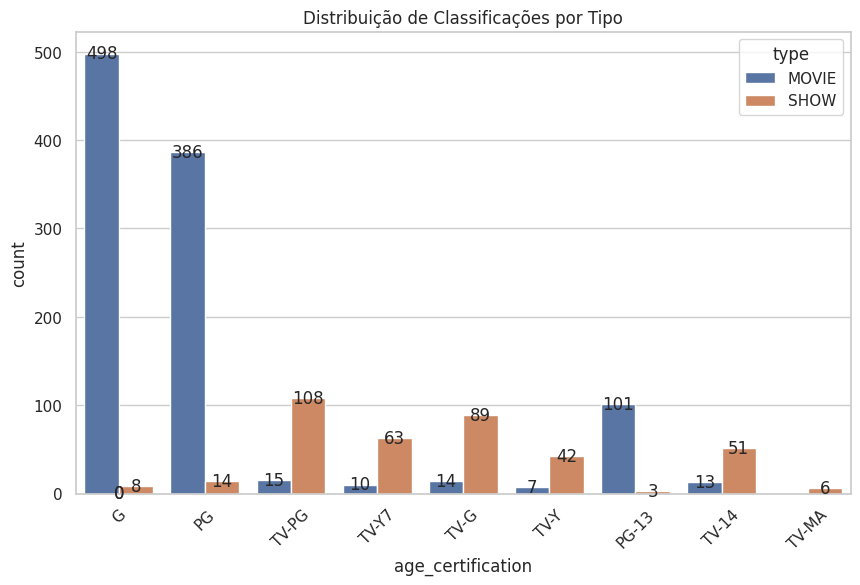

In [213]:
## Distribuição de classificações por tipo
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=disney_plus, x='age_certification', hue='type')
add_labels_to_bars(ax)
plt.title('Distribuição de Classificações por Tipo')
plt.xticks(rotation=45)
plt.show()

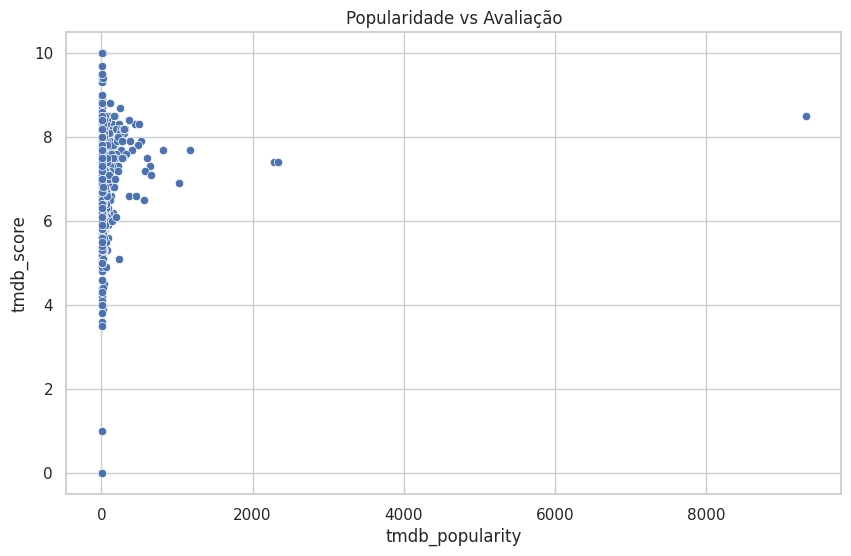

In [214]:
# Relação Entre Popularidade e Avaliação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=disney_plus, x='tmdb_popularity', y='tmdb_score')
plt.title('Popularidade vs Avaliação')
plt.show()

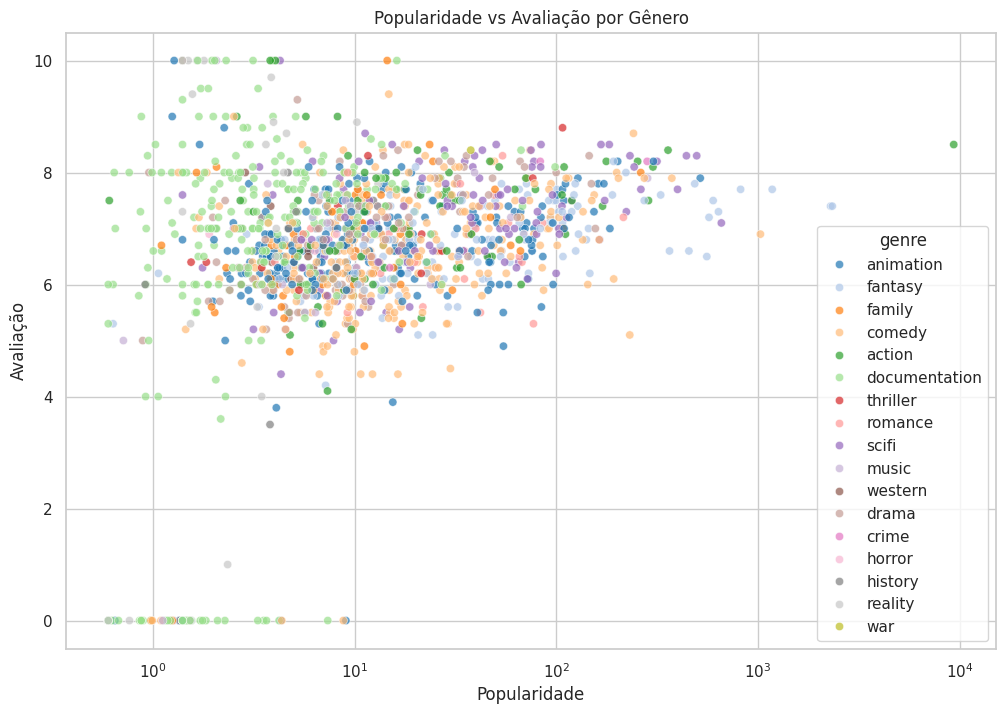

In [215]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=disney_plus, x='tmdb_popularity', y='tmdb_score', hue='genre', palette='tab20', alpha=0.7)
plt.title('Popularidade vs Avaliação por Gênero')
plt.xlabel('Popularidade')
plt.ylabel('Avaliação')
plt.xscale('log')  # Usar escala logarítmica para popularidade, se necessário
plt.show()


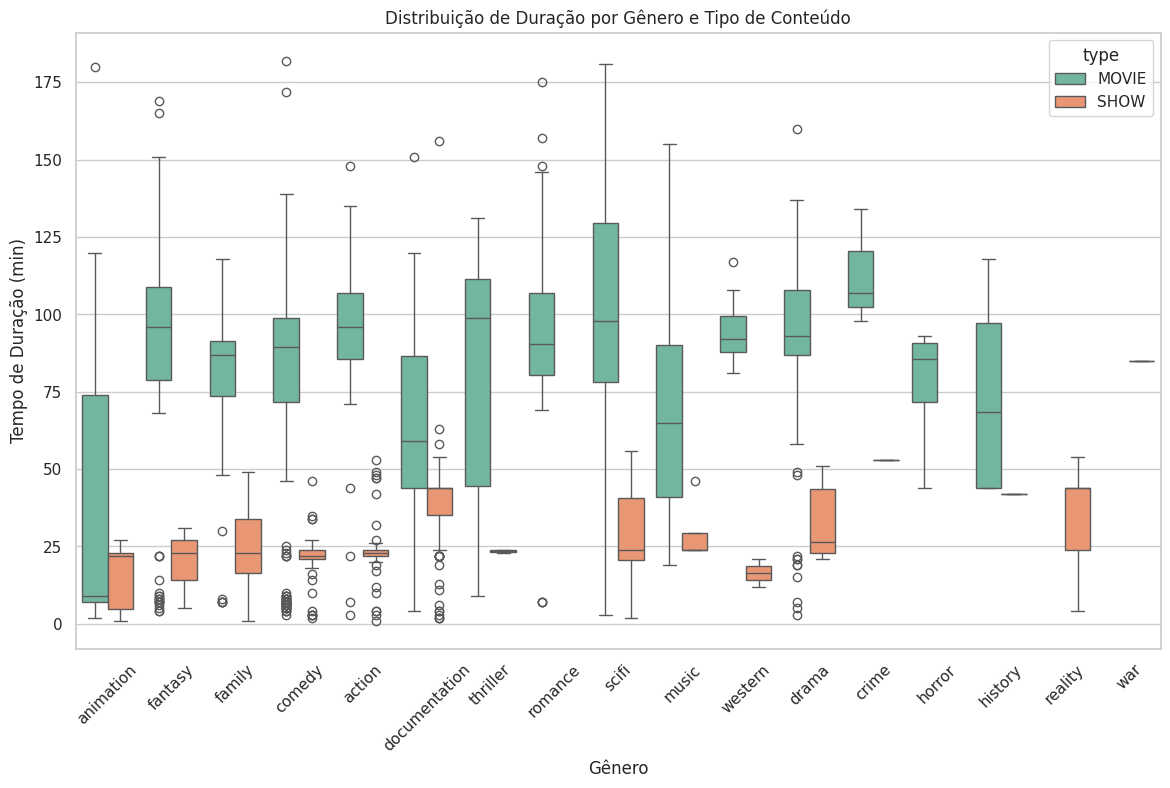

In [216]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=disney_plus, x='genre', y='runtime', hue='type', palette='Set2')
plt.title('Distribuição de Duração por Gênero e Tipo de Conteúdo')
plt.xlabel('Gênero')
plt.ylabel('Tempo de Duração (min)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-217-cdf46635e030>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_popularity_score, x='type', y='tmdb_popularity', palette='viridis')
<ipython-input-217-cdf46635e030>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_score_score, x='type', y='tmdb_score', palette='viridis')


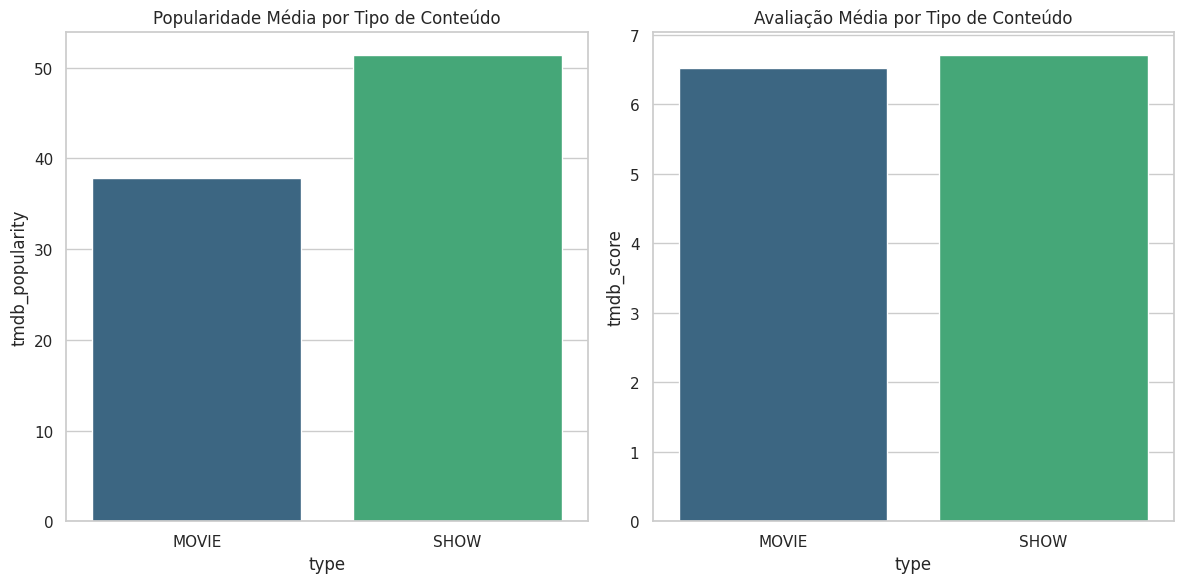

In [217]:
plt.figure(figsize=(12, 6))
avg_popularity_score = disney_plus.groupby('type')['tmdb_popularity'].mean().reset_index()
avg_score_score = disney_plus.groupby('type')['tmdb_score'].mean().reset_index()

plt.subplot(1, 2, 1)
sns.barplot(data=avg_popularity_score, x='type', y='tmdb_popularity', palette='viridis')
plt.title('Popularidade Média por Tipo de Conteúdo')

plt.subplot(1, 2, 2)
sns.barplot(data=avg_score_score, x='type', y='tmdb_score', palette='viridis')
plt.title('Avaliação Média por Tipo de Conteúdo')

plt.tight_layout()
plt.show()

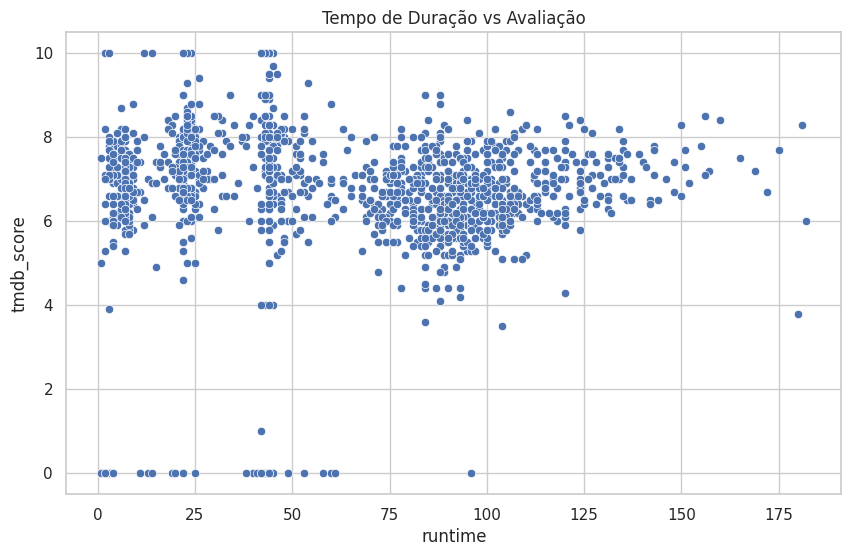

In [218]:
# Impacto do Tempo de Duração na Avaliação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=disney_plus, x='runtime', y='tmdb_score')
plt.title('Tempo de Duração vs Avaliação')
plt.show()

<Figure size 1400x800 with 0 Axes>

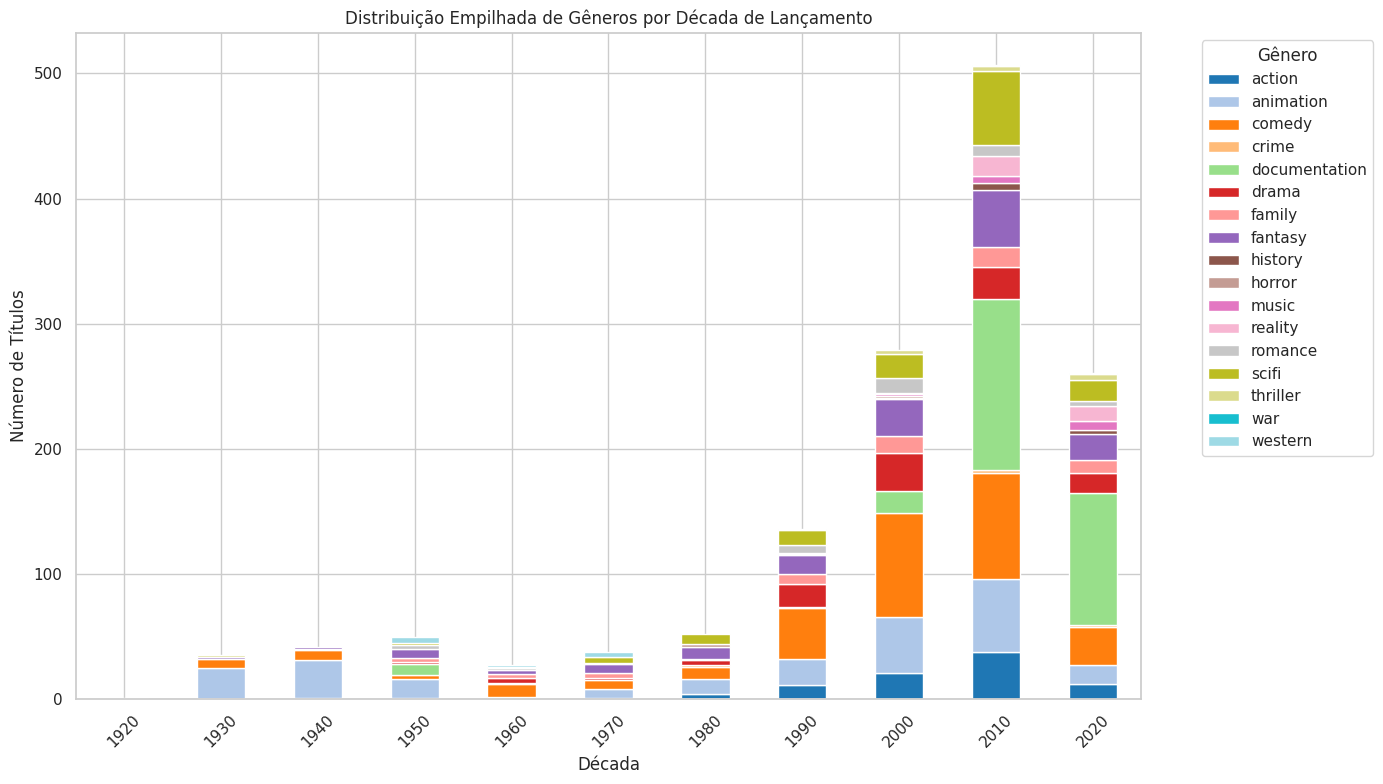

In [219]:
# Defina a função para agrupar anos em décadas
def group_years_by_decade(year):
    if pd.isna(year):
        return None
    return (year // 10) * 10
# Aplicar a função para criar a nova coluna 'decade'
disney_plus['decade'] = disney_plus['release_year'].apply(group_years_by_decade)

# Pivotar os dados para o formato de barras empilhadas
decade_genre_pivot = disney_plus.pivot_table(index='decade', columns='genre', aggfunc='size', fill_value=0)

# Plotar os dados
plt.figure(figsize=(14, 8))
decade_genre_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Distribuição Empilhada de Gêneros por Década de Lançamento')
plt.xlabel('Década')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


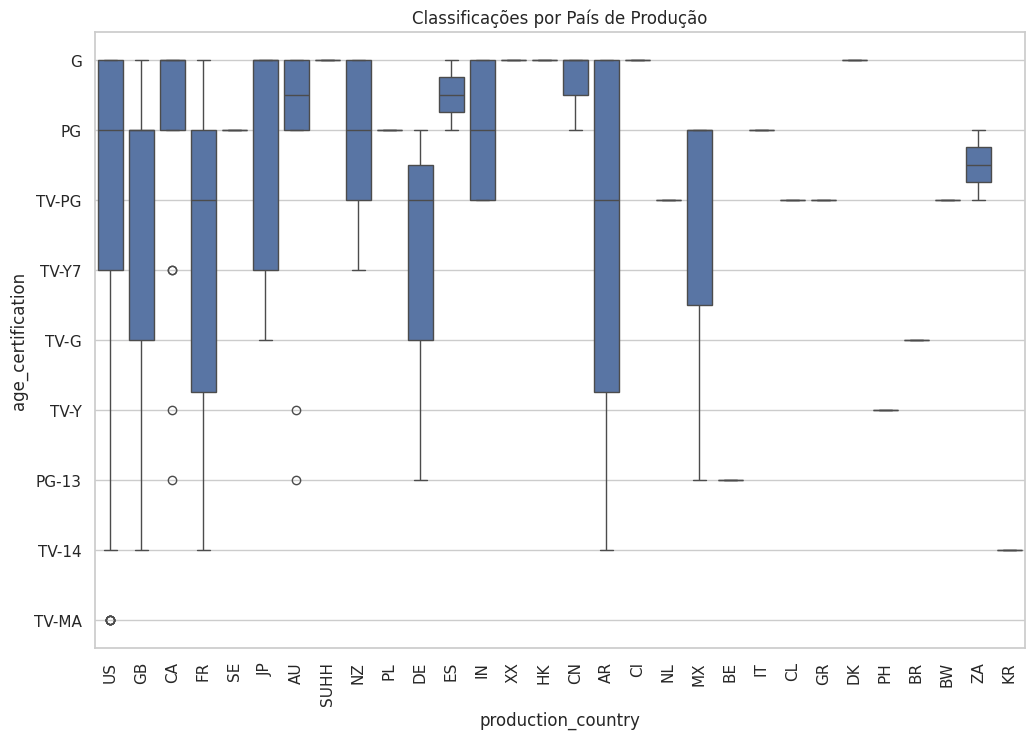

In [220]:
# Comparação de Classificações por País de Produção
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=disney_plus, x='production_country', y='age_certification')
plt.title('Classificações por País de Produção')
plt.xticks(rotation=90)
plt.show()

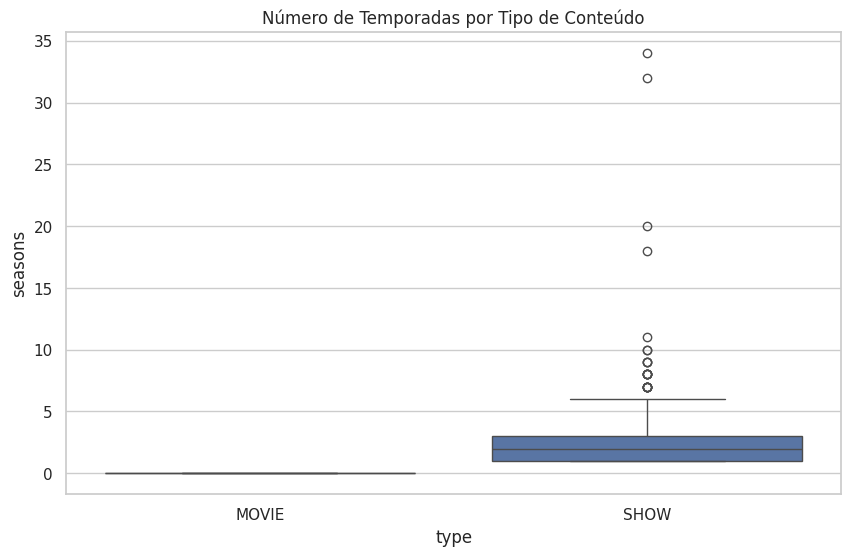

In [221]:
# Comparação do Número de Temporadas por Tipo de Conteúdo
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=disney_plus, x='type', y='seasons')
plt.title('Número de Temporadas por Tipo de Conteúdo')
plt.show()

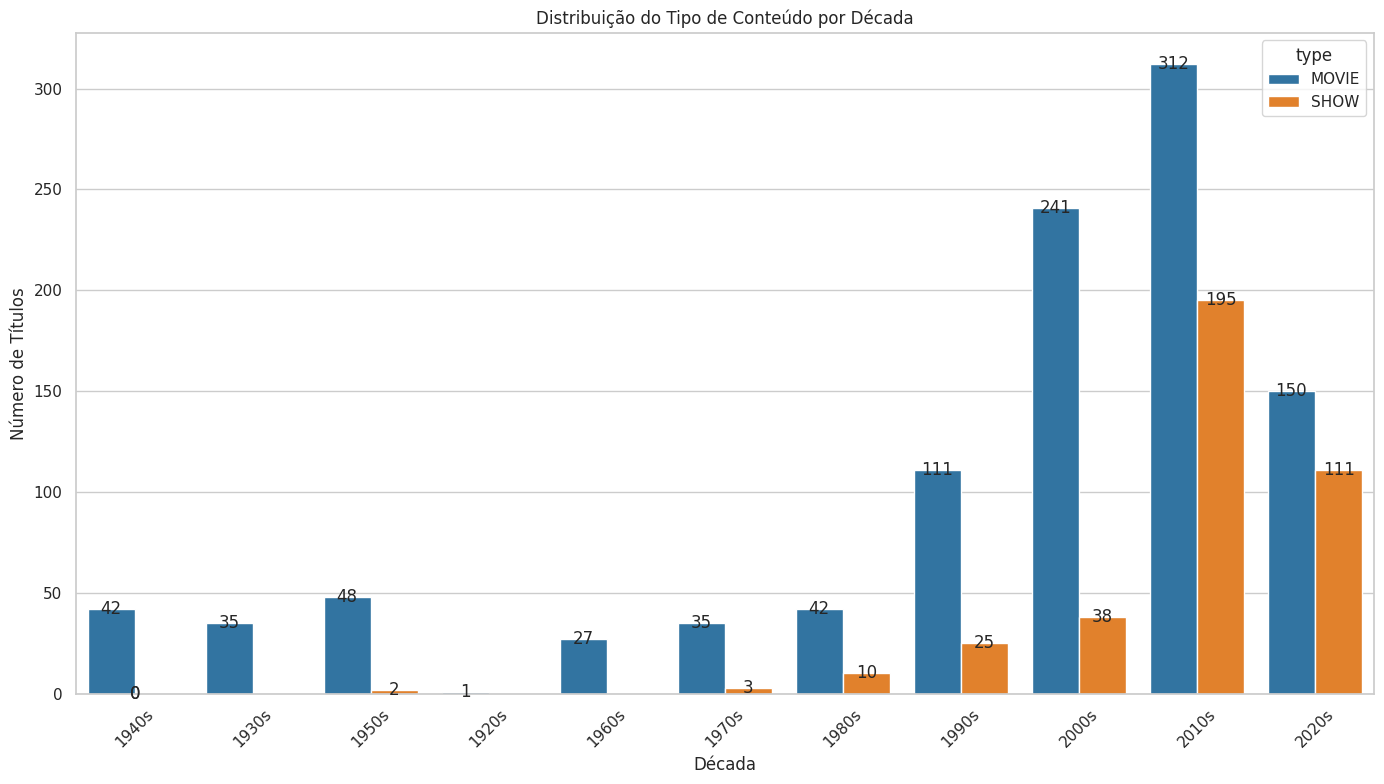

In [222]:
# Função para agrupar anos em décadas
def group_years_by_decade(year):
    return f"{(year // 10) * 10}s"

# Aplicar a função para criar uma nova coluna 'decade'
disney_plus['decade'] = disney_plus['release_year'].apply(group_years_by_decade)

# Plotar o gráfico de barras empilhadas com décadas no eixo x
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=disney_plus, x='decade', hue='type', palette='tab10')
plt.title('Distribuição do Tipo de Conteúdo por Década')
plt.xlabel('Década')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45)

# Adicionar números acima das barras
def add_labels_to_bars(ax):
    """Adiciona os valores acima das barras em um gráfico de barras."""
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='center')

add_labels_to_bars(ax)
plt.tight_layout()
plt.show()

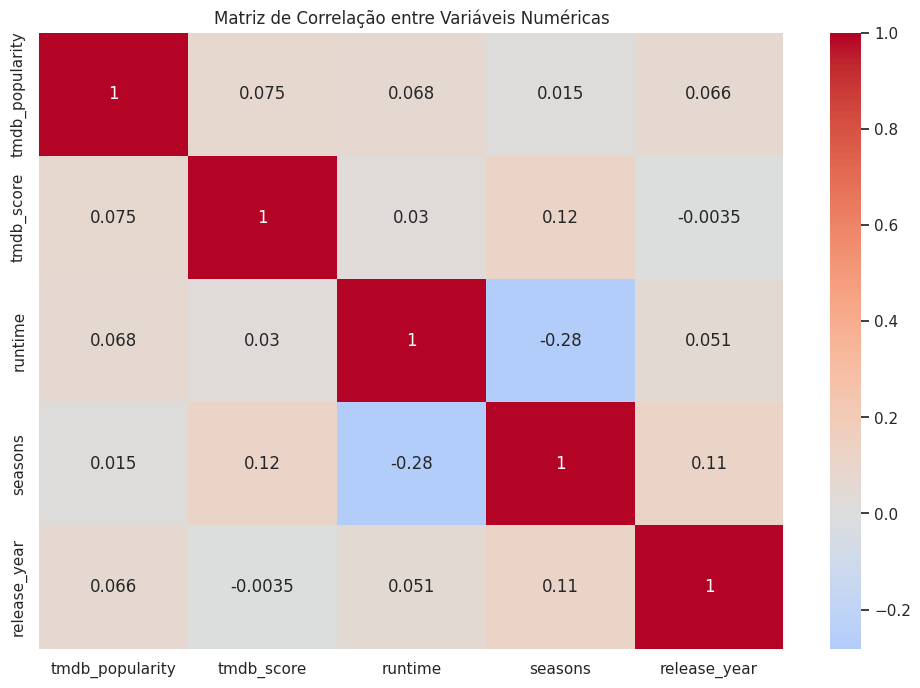

In [223]:
plt.figure(figsize=(12, 8))
correlation_matrix = disney_plus[['tmdb_popularity', 'tmdb_score', 'runtime', 'seasons','release_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Devido as correlações fracas, melhor forma de seguir já que não possui um histório de usabilidade, é pelo formato de filtragem baseada em conteúdo, para recomendar filmes e séries semelhantes ao título visto anteriormente.

**Modelo**

In [224]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [225]:
df = disney_plus  # Considerando que o dataset já está carregado na variável disney_plus


In [257]:
# Pré-processamento
# Selecionar as colunas de interesse para filtragem baseada em conteúdo
content_features = df[['release_year', 'runtime', 'seasons', 'tmdb_score', 'type', 'genre', 'age_certification']]
titles = df['title']

In [258]:
# Codificar as variáveis categóricas
le = LabelEncoder()
content_features['type'] = le.fit_transform(content_features['type'])
content_features = pd.get_dummies(content_features, columns=['genre', 'age_certification'])

<ipython-input-258-013a7e501369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_features['type'] = le.fit_transform(content_features['type'])


In [259]:
# Normalizar as características
scaler = StandardScaler()
content_features_scaled = scaler.fit_transform(content_features)


In [260]:
# Criar uma matriz de similaridade usando a similaridade do cosseno
cosine_sim = cosine_similarity(content_features_scaled, content_features_scaled)

In [261]:
item_names = df['title'].tolist()  # Lista de títulos dos itens
item_ids = df['id'].tolist()       # Lista de IDs dos itens

In [272]:
# Número de clusters desejado (ajuste conforme necessário)
num_clusters = 19

# Aplicando K-Means à matriz de similaridade
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(cosine_sim)

# Adicionando os clusters como uma nova coluna no DataFrame
df['cluster'] = clusters

# Exibindo uma amostra dos clusters
df_sample = df[['title', 'cluster']].sample(10)
print(df_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                  title  cluster
1300                          Lamp Life        6
971            United States of Animals       16
1126                  Destination World       16
954         LEGO Star Wars: Droid Tales       10
851                  Wander Over Yonder       13
1093       Marvel Super Hero Adventures       10
1249                      Wild Portugal        2
1022                 Marvel's Iron Fist       10
850   The Wizards Return: Alex vs. Alex       17
435                             Ice Age       11


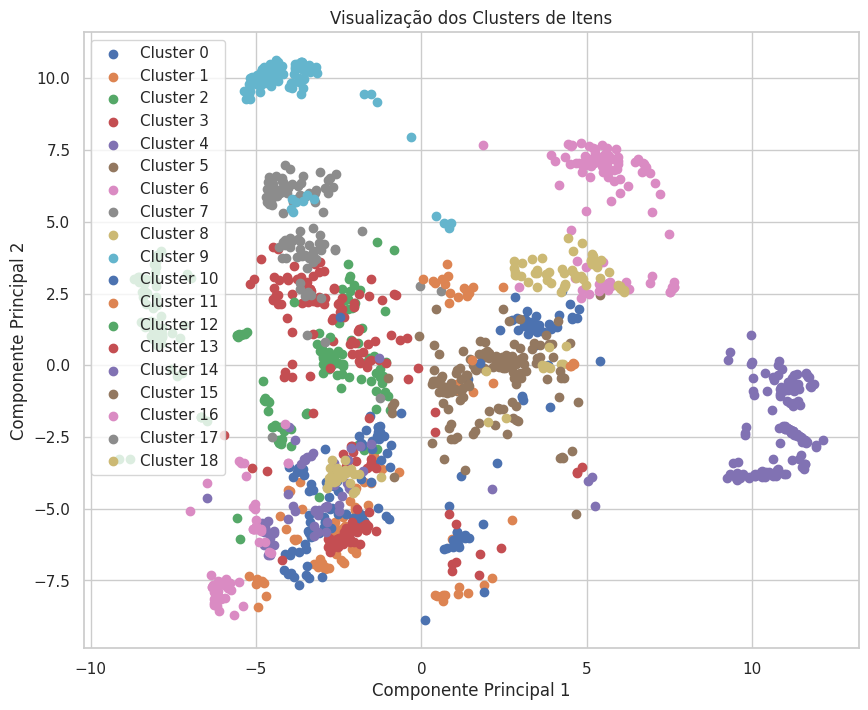

In [273]:
# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cosine_sim)

# Plotando os clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    plt.scatter(reduced_data[clusters == cluster, 0], reduced_data[clusters == cluster, 1], label=f"Cluster {cluster}")

plt.legend()
plt.title("Visualização dos Clusters de Itens")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [274]:
def recomendar_itens_texto(item_index, df, num_recom=5):
    # Obtém o cluster do item em questão
    cluster_do_item = df.loc[item_index, 'cluster']

    # Encontra outros itens no mesmo cluster
    itens_no_cluster = df[df['cluster'] == cluster_do_item].index

    # Remove o próprio item da lista de recomendações
    itens_no_cluster = itens_no_cluster[itens_no_cluster != item_index]

    # Selecione os primeiros N itens do mesmo cluster para recomendar
    recomendacoes = itens_no_cluster[:num_recom]

    # Retornar os títulos dos itens recomendados
    recomendacoes_nomes = df.loc[recomendacoes, 'title'].tolist()

    return recomendacoes_nomes


In [275]:
# Exemplo de uso:
item_index = 3  # Índice do item para o qual você quer recomendações
recomendacoes = recomendar_itens_texto(item_index, df)
print(f"Recomendações para '{df.loc[item_index, 'title']}':")
for recomendacao in recomendacoes:
    print(f"  - {recomendacao}")

Recomendações para 'Bambi':
  - Fantasia
  - Pinocchio
  - Dumbo
  - The Three Caballeros
  - Fun and Fancy Free


In [276]:
# Aplicando K-Means à matriz de similaridade
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(cosine_sim)

# Calculando o Silhouette Score
score = silhouette_score(cosine_sim, clusters, metric='cosine')
print(f"Silhouette Score: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5355


In [277]:
def recommend_movie(title, cosine_sim=cosine_sim, num_recom=10):
    # Verifique se o título está presente no DataFrame
    if title not in titles.values:
        return f"Title '{title}' not found in dataset."

    idx = titles[titles == title].index[0]

    # Recomendação baseada em conteúdo
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recom + 1]  # Pega os N filmes mais semelhantes, excluindo o próprio filme

    if len(sim_scores) == 0:
        return f"No similar movies found for '{title}'."

    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = df['title'].iloc[movie_indices].tolist()

    return recommended_movies

In [278]:
# Testar a recomendação
filme = 'Peter Pan'
recomendacoes = recommend_movie(filme, cosine_sim=cosine_sim)
print(f"Filmes recomendados semelhantes a '{filme}':")
for rec in recomendacoes:
    print(f"  - {rec}")

Filmes recomendados semelhantes a 'Peter Pan':
  - The Cheetah Girls 2
  - Sharpay's Fabulous Adventure
  - A Celebration of the Music from Coco
  - Shanghai Disney Resort Grand Opening Gala
  - Disney Princess Remixed: An Ultimate Princess Celebration
  - Disney's Broadway Hits at London's Royal Albert Hall
  - I am Luna
  - Black Is King
  - Happier Than Ever: A Love Letter to Los Angeles
  - The Queen Family Singalong


In [279]:
titles_to_filter = ['Cinderella', 'Alice in Wonderland', 'Peter Pan', 'Snow White and the Seven Dwarfs', 'The Adventures of Ichabod and Mr. Toad', 'Perri', 'The Reluctant Dragon', "Darby O'Gill and the Little People", 'Babes in Toyland', "Blackbeard's Ghost", 'The Rescuers']
filtered_df = disney_plus[disney_plus['title'].isin(titles_to_filter)]
filtered_df

,id,title,type,description,release_year,age_certification,runtime,seasons,tmdb_popularity,tmdb_score,genre,production_country,decade,cluster
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,0.0,107.137,7.1,fantasy,US,1930s,8
5,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1949,G,68,0.0,10.862,6.5,fantasy,US,1940s,8
6,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,0.0,144.284,7.0,fantasy,US,1950s,8
9,tm77826,The Reluctant Dragon,MOVIE,Humorist Robert Benchley attempts to find Walt...,1941,G,74,0.0,6.958,6.6,fantasy,US,1940s,8
95,tm130611,Alice in Wonderland,MOVIE,"On a golden afternoon, young Alice follows a W...",1951,G,75,0.0,93.593,7.2,fantasy,US,1950s,8
101,tm105286,Peter Pan,MOVIE,"Leaving the safety of their nursery behind, We...",1953,G,77,0.0,66.222,7.2,fantasy,US,1950s,8
112,tm47427,Darby O'Gill and the Little People,MOVIE,A wily old codger matches wits with the King o...,1959,G,90,0.0,5.332,6.9,fantasy,US,1950s,8
114,tm92967,The Rescuers,MOVIE,What can two little mice possibly do to save a...,1977,G,78,0.0,17.902,6.8,fantasy,US,1970s,8
122,tm45750,Babes in Toyland,MOVIE,"All roads lead to magical, merry Toyland as Ma...",1961,G,101,0.0,5.900,6.0,fantasy,US,1960s,8
129,tm15888,Blackbeard's Ghost,MOVIE,"Peter Ustinov stars as the eponymous wraith, w...",1968,G,106,0.0,10.982,6.7,fantasy,US,1960s,8


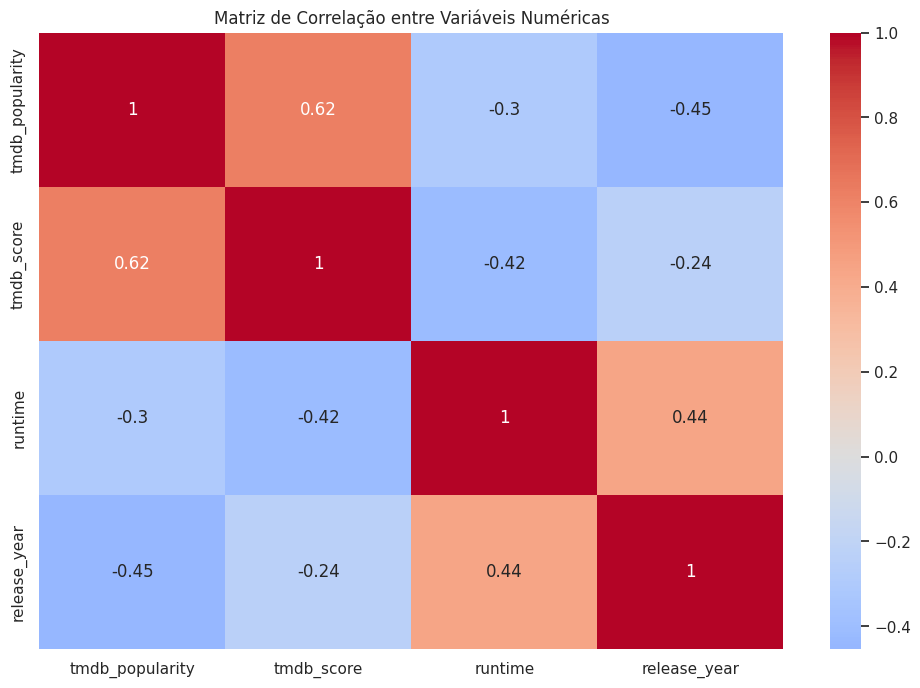

In [280]:
plt.figure(figsize=(12, 8))
correlation_matrix = filtered_df[['tmdb_popularity', 'tmdb_score', 'runtime','release_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

A lista de filmes inclui outros clássicos que compartilham elementos de fantasia, contos de fadas e animação tradicional da Disney, o que é provavelmente o que alguém que gostou de "Cinderella" está buscando. A boa correlação entre popularidade e pontuação também sugere que esses filmes são bem apreciados, o que é sempre um bom indicador ao fazer recomendações.